In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data/netflix_titles.csv") # Import netflix_titles.csv file
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [3]:
data["date_added"] = pd.to_datetime(data["date_added"]) # Cast date of date_added to datetime
data["day"] = data["date_added"].dt.day # Extract month from datetime column
data["month"] = data["date_added"].dt.month # Extract month from datetime column
data["year"] = data["date_added"].dt.year # Extract year from datetime column
data = data[data["year"]<2021]
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day,month,year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,12.0,2018.0


# Amount of contents that are added in each year

In [4]:
data_groupby = data[["year","month","show_id"]]
data_groupby = data_groupby.groupby(by=["year","month"],as_index = False).count()
data_groupby.head()

,year,month,show_id
0,2008.0,1.0,1
1,2008.0,2.0,1
2,2009.0,5.0,1
3,2009.0,11.0,1
4,2010.0,11.0,1


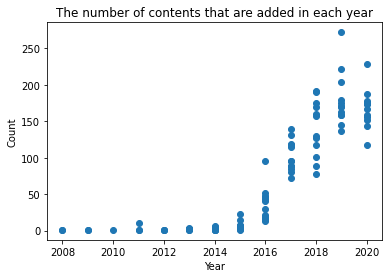

In [5]:
plt.scatter(data_groupby["year"],data_groupby["show_id"])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("The number of contents that are added in each year")
plt.show()

Note that we won't split the data to train and test because we have few data after using groupby

In [6]:
X = data_groupby.drop(["month","show_id"],axis=1)
y = data_groupby["show_id"]

As we can see in the above figure, the data tend to be non-linear(Polynomial). So we have to use Polynomial Regression instead

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

## 1. Build the model with Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_poly, y)
lr_pred = lr.predict(X_poly)
print(f"R-Squared: {lr.score(X_poly,y)}")

R-Squared: 0.8417232039261894


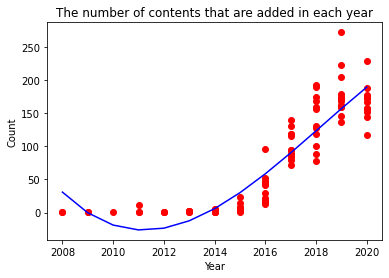

In [9]:
plt.scatter(X,y,color = 'red')
plt.plot(X, lr_pred, color = 'blue')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("The number of contents that are added in each year")
plt.show() # Scatter plot of the year and the number of content in that year

#### Evaluate Linear Regression model with RMSE

In [10]:
from sklearn.metrics import mean_squared_error

print(f"RMSE: {mean_squared_error(y,lr_pred,squared=False):.2f}") # Evaluate the model with RMSE

RMSE: 29.93


#### Predict future year with Linear Regression model

In [11]:
year = 2021
pred_future = round(lr.predict(poly_reg.transform([[year]]))[0])
print(f"In {year}, the number of content per month: {pred_future} contents, per year: {pred_future*12:.0f} contents")

In 2021, the number of content per month: 219 contents, per year: 2628 contents


## 2. Build the model with Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_poly, y)
rf_pred = rf.predict(X_poly)
print(f"R-Squared: {rf.score(X_poly,y)}")

R-Squared: 0.9076241612308332


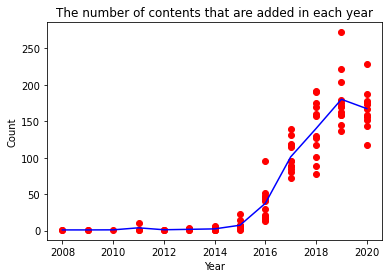

In [13]:
plt.scatter(X,y,color = 'red')
plt.plot(X, rf_pred, color = 'blue')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("The number of contents that are added in each year")
plt.show() # Scatter plot of the year and the number of content in that year

#### Evaluate Random Forest model with RMSE

In [14]:
from sklearn.metrics import mean_squared_error

print(f"RMSE: {mean_squared_error(y,rf_pred,squared=False):.2f}") # Evaluate the model with RMSE

RMSE: 22.87


#### Predict future year with Random Forest model

In [15]:
year = 2021
pred_future = round(rf.predict(poly_reg.transform([[year]]))[0])
print(f"In {year}, the number of content per month: {pred_future} contents, per year: {pred_future*12:.0f} contents")

In 2021, the number of content per month: 167 contents, per year: 2004 contents
